In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [2]:
def get_eke(case):
    year='2011-2013'

    dirmean='/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-'+case+'-MEAN/'+year+'/'

    title="NACHOS12.L75-"+case+" "+year

    fileEKE=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_EKE.nc'
    dsEKE=xr.open_dataset(fileEKE,decode_times=False)
    eke=dsEKE.voeke[0,0]

    lat=dsEKE.nav_lat
    lon=dsEKE.nav_lon


    return lon,lat,eke

In [3]:
def plot_atl(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-100, 50, 0, 70])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)
  


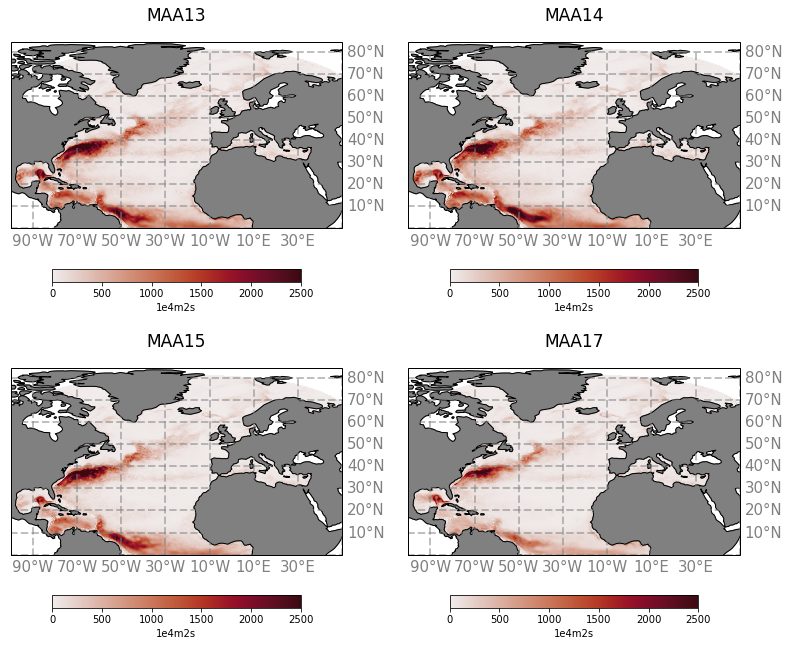

In [4]:

# Plots Atlantique EKE
lon,lat,eke1=get_eke('MAA13')
lon,lat,eke2=get_eke('MAA14')
lon,lat,eke3=get_eke('MAA15')
lon,lat,eke4=get_eke('MAA17')

fig = plt.figure(figsize=(15,11))
plot_atl(fig,221,10000*eke1,0,2500,'1e4m2s','MAA13',cmocean.cm.amp)
plot_atl(fig,222,10000*eke2,0,2500,'1e4m2s','MAA14',cmocean.cm.amp)
plot_atl(fig,223,10000*eke3,0,2500,'1e4m2s','MAA15',cmocean.cm.amp)
plot_atl(fig,224,10000*eke4,0,2500,'1e4m2s','MAA17',cmocean.cm.amp)
#fig.suptitle('NACHOS12.L75 2011-2013 mean of surface EKE', fontsize=25)


plt.savefig('Surf_EKE_MAA13-14-15-17_2011-2013.png',bbox_inches='tight')

In [7]:
def plot_lab(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-80, -40, 50, 70])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-80,-75,-70,-65,-60,-55,-50,-45,-40])
        gl.ylocator = mticker.FixedLocator([50,55,60,65,70,75,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)
  


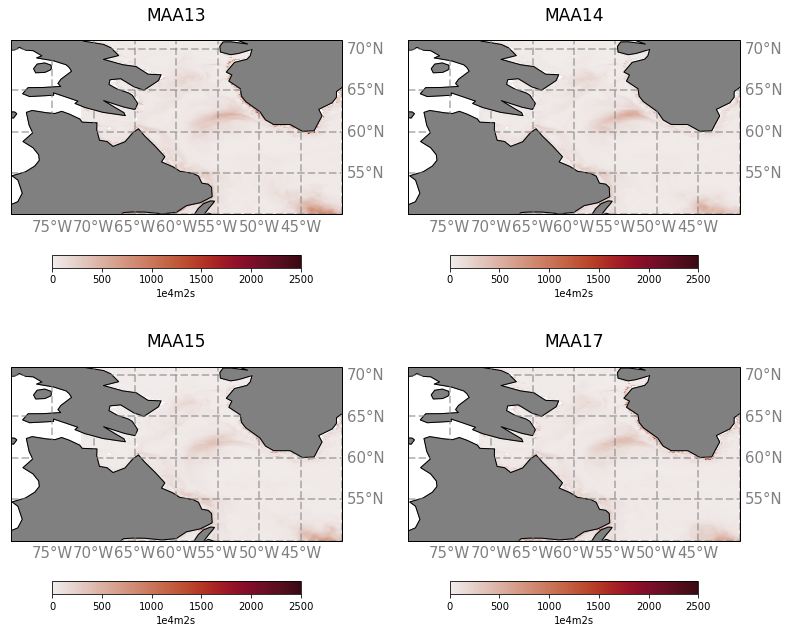

In [8]:

fig = plt.figure(figsize=(15,11))
plot_lab(fig,221,10000*eke1,0,2500,'1e4m2s','MAA13',cmocean.cm.amp)
plot_lab(fig,222,10000*eke2,0,2500,'1e4m2s','MAA14',cmocean.cm.amp)
plot_lab(fig,223,10000*eke3,0,2500,'1e4m2s','MAA15',cmocean.cm.amp)
plot_lab(fig,224,10000*eke4,0,2500,'1e4m2s','MAA17',cmocean.cm.amp)
#fig.suptitle('NACHOS12.L75 2011-2013 mean of surface EKE', fontsize=25)


plt.savefig('Surf_EKE_zoomLAB_MAA13-14-15-17_2011-2013.png',bbox_inches='tight')